<a href="https://colab.research.google.com/github/UrvashiKumar/Data201_Python2022/blob/main/Data201_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data 201 - CAPSTONE**
___

Data Set: **311 Service Requests from 2010 to Present**

Project Topic: **New York City Rat Sightings Analysis**

Data Source: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9
___


**Overview**

The Data source for this project is obtained from NYC Open Data page, and consists of 311 call information for a period from 2010 to present. 

The specific subset of data used is for complaints category related to Rodent and Rat sighting reports. The analysis seeks to study overall trends, specific insights, or any particular observations that can be inferred from the data.

### **Set up Basics**
___

In [293]:
# Load various libraries we need for this analysis
import pandas as pd
from google.colab import drive
from google.colab import files
import numpy as np
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
import plotly.express as px
import json
import matplotlib.pyplot as plt
import missingno as msno

### **Importing and Reading the Data**
____

In [294]:
# Uploding the file and reading the data
df_rodent = pd.read_csv('/content/NYC_Rodents_RatSighting.csv')

In [295]:
# Seeing the first 5 records in the data set 
df_rodent.head()

,Unique Key,Created Date,Year,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,Status,Borough,Open Data Channel Type,Latitude,Longitude,Location
0,40177738,9/3/2018,2018,DOHMH,Rodent,Rat Sighting,3+ Family Apt. Building,11229.0,Closed,BROOKLYN,PHONE,40.598479,-73.959684,"(40.598478991333735, -73.9596835550102)"
1,40182786,9/3/2018,2018,DOHMH,Rodent,Mouse Sighting,3+ Family Mixed Use Building,11238.0,Closed,BROOKLYN,ONLINE,40.675409,-73.958065,"(40.67540930181273, -73.95806521641663)"
2,40208548,9/6/2018,2018,DOHMH,Rodent,Condition Attracting Rodents,Vacant Lot,10460.0,Closed,BRONX,PHONE,40.843550,-73.870303,"(40.84355010845945, -73.87030315388336)"
3,39774074,7/19/2018,2018,DOHMH,Rodent,Condition Attracting Rodents,1-2 Family Dwelling,11215.0,Closed,BROOKLYN,PHONE,40.664071,-73.979209,"(40.66407090346956, -73.97920918932644)"
4,40274380,9/13/2018,2018,DOHMH,Rodent,Condition Attracting Rodents,Commercial Building,11207.0,Closed,BROOKLYN,PHONE,40.659647,-73.883247,"(40.659646586116985, -73.88324683494396)"


In [296]:
# Check the size of the data (number of rows and columns)
df_rodent.shape

(380902, 14)

In [297]:
# Check the index
df_rodent.index

RangeIndex(start=0, stop=380902, step=1)

In [298]:
# Display all column names
df_rodent.columns

Index(['Unique Key', 'Created Date', 'Year', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Status', 'Borough',
       'Open Data Channel Type', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [299]:
# Check data type for each columns
df_rodent.dtypes

Unique Key                  int64
Created Date               object
Year                        int64
Agency                     object
Complaint Type             object
Descriptor                 object
Location Type              object
Incident Zip              float64
Status                     object
Borough                    object
Open Data Channel Type     object
Latitude                  float64
Longitude                 float64
Location                   object
dtype: object

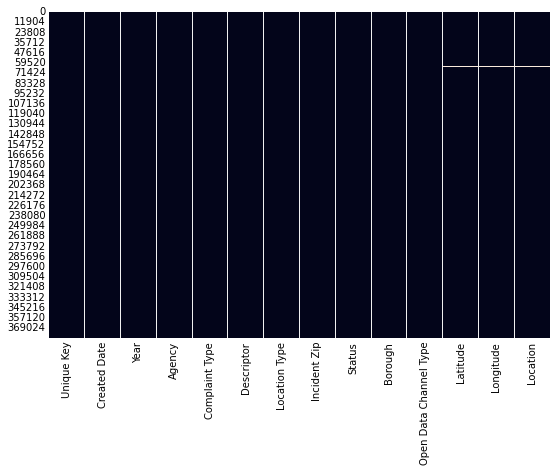

In [300]:
# check missing values in columns via heatmap
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_rodent.isnull(), cbar=False)

### **Cleaning, Exploration and Visualisation**
____

In [301]:
# Droping null values
df_rodent_new = df_rodent.dropna()
df_rodent_new.isnull().sum()

Unique Key                0
Created Date              0
Year                      0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
Status                    0
Borough                   0
Open Data Channel Type    0
Latitude                  0
Longitude                 0
Location                  0
dtype: int64

In [302]:
# Checking the size for the data after dropping null values
df_rodent_new.shape

(378039, 14)

### ***a. Total counts of rat sightings for each Year***



In [303]:
# Grouping by year to see the total number of rat sightings for each year
df_rodent_year = df_rodent_new.groupby(['Year'])['Unique Key'].count()
df_rodent_year

Year
2010    22062
2011    21413
2012    21206
2013    22245
2014    24394
2015    29205
2016    31255
2017    34864
2018    32353
2019    31089
2020    27277
2021    38408
2022    40778
2023     1490
Name: Unique Key, dtype: int64

In [304]:
# Dropping row
df_Year = df_rodent_year.drop(df_rodent_year.index[[13]])
df_Year 

Year
2010    22062
2011    21413
2012    21206
2013    22245
2014    24394
2015    29205
2016    31255
2017    34864
2018    32353
2019    31089
2020    27277
2021    38408
2022    40778
Name: Unique Key, dtype: int64

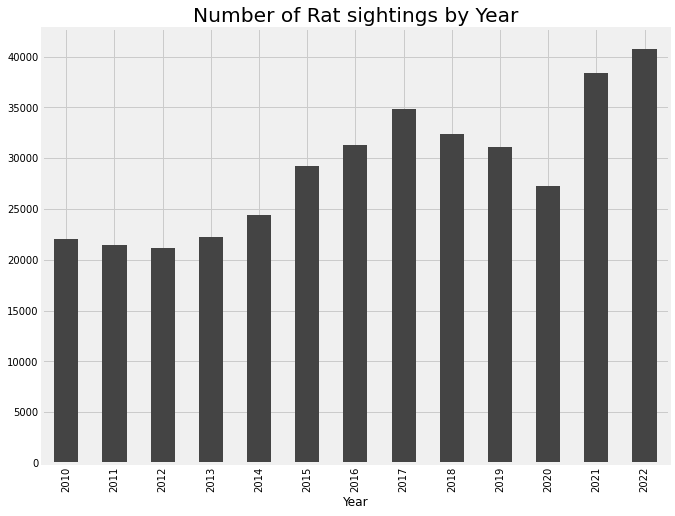

In [305]:
# Figure1 : Bar graph representing Total number of rat sighting for each Year
df_Year.plot(kind='bar', figsize=(10,8), color='#444444') 
plt.style.use('fivethirtyeight')
plt.title('Number of Rat sightings by Year')
plt.show()

### ***`Interpretation : Overall trend indicates a fluctuating pattern with increases over some period and decreases in others. However, the standout observation is there is a sharp increase from the year 2020 to 2021`*** 
____

### ***b. The Percentage difference in counts for each Year***

In [306]:
# Calculating the percent change for each year
df_Year_pct = df_Year.pct_change(fill_method='ffill')
df_Year_pct

Year
2010         NaN
2011   -0.029417
2012   -0.009667
2013    0.048996
2014    0.096606
2015    0.197221
2016    0.070193
2017    0.115470
2018   -0.072023
2019   -0.039069
2020   -0.122616
2021    0.408073
2022    0.061706
Name: Unique Key, dtype: float64

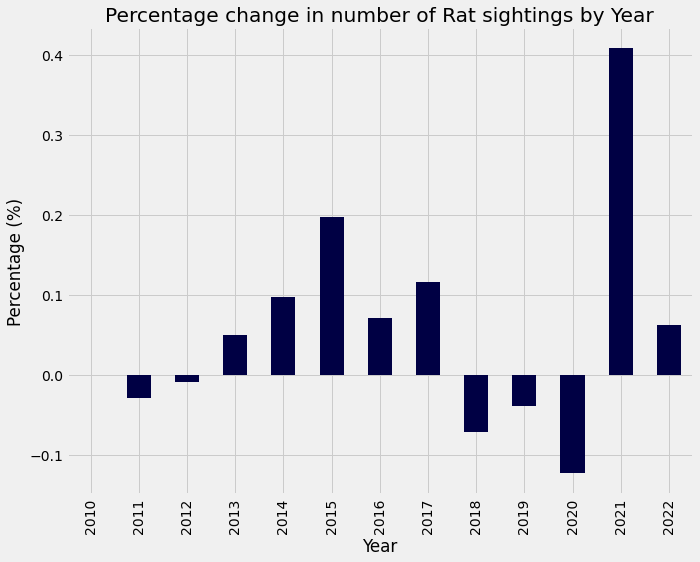

In [307]:
# Figure 2 : representing percent change as bar graph
ax = df_Year_pct.plot(kind='bar', figsize=(10,8), color='#000044')
plt.style.use("fivethirtyeight")
ax.set_xlabel('Year')
ax.set_ylabel('Percentage (%)')
plt.title('Percentage change in number of Rat sightings by Year')

plt.show()

### ***`Interpretation: The above observation of the sharp increase is further supported by Year-on-year percantage increase, which shows the change from 2020 to 2021 to the highest at over 40%`***
___

###   ***c. Borough wise counts of rat sightings for year 2020 and 2021***

In [308]:
# Total number of rat sighting in each Borough
df_rodent_borough = df_rodent_new.groupby(['Borough'])['Unique Key'].count()
df_rodent_borough 

Borough
BRONX             74043
BROOKLYN         130200
MANHATTAN         90017
QUEENS            64999
STATEN ISLAND     18774
Unspecified           6
Name: Unique Key, dtype: int64

In [309]:
# Dropping columns
df_borough = df_rodent_new .drop(['Unique Key','Created Date', 'Agency','Complaint Type', 'Location Type','Incident Zip','Latitude',
                                  'Longitude','Status','Open Data Channel Type','Location'], axis = 1)

#selecting years 2020 and 2021 for analysis
df_borough_year = df_borough[(df_borough['Year'] >= 2020) & (df_borough['Year'] <= 2021)] 

In [310]:
# Grouping by year and Borough
df_borough_gp =df_borough_year.groupby(['Year','Borough']).count()
df_borough_new = df_borough_gp.add_suffix('.').reset_index()
df_borough_new 

,Year,Borough,Descriptor.
0,2020,BRONX,5102
1,2020,BROOKLYN,9511
2,2020,MANHATTAN,6428
3,2020,QUEENS,4982
4,2020,STATEN ISLAND,1254
5,2021,BRONX,7025
6,2021,BROOKLYN,14368
7,2021,MANHATTAN,9938
8,2021,QUEENS,5731
9,2021,STATEN ISLAND,1345


In [311]:
# Dropping row - unspecified
df_Borough = df_borough_new.drop(df_borough_new.index[[10]])
df_Borough

,Year,Borough,Descriptor.
0,2020,BRONX,5102
1,2020,BROOKLYN,9511
2,2020,MANHATTAN,6428
3,2020,QUEENS,4982
4,2020,STATEN ISLAND,1254
5,2021,BRONX,7025
6,2021,BROOKLYN,14368
7,2021,MANHATTAN,9938
8,2021,QUEENS,5731
9,2021,STATEN ISLAND,1345


In [312]:
# Figure 3 : Histogram representing total rat sightings in each Borough for year 2020 and 2021
fig = px.histogram(df_Borough, x="Year", y="Descriptor.", title = 'Number of Rat Sightings by Borough', color='Borough', barmode='group', width = 900 , height=600)
fig.show()

### ***`Interpretation: Further analysis for this period by breakdown of numbers based on idividual boroughs reveals that all the boroughs showed an increase. Brooklyn has the highest count.`***
___

### ***d. Number of rat sightings complaints based on Location Type***

In [313]:
# Total counts for rat sighting complaints by location type
df_rodent_location = df_rodent_new.groupby(['Location Type'])['Descriptor'].count().sort_values(ascending=False)
df_rodent_location.head(10)

Location Type
3+ Family Apt. Building          160475
1-2 Family Dwelling               83144
Other (Explain Below)             44966
3+ Family Mixed Use Building      24644
Commercial Building               20752
Vacant Lot                        11749
Construction Site                  6698
1-2 Family Mixed Use Building      6676
Vacant Building                    5862
Parking Lot/Garage                 3419
Name: Descriptor, dtype: int64

In [314]:
# dropping index with unexplained data
df_Location_new = df_rodent_location.drop(df_rodent_location.index[[2]])
df_Location_new.head(10)

Location Type
3+ Family Apt. Building          160475
1-2 Family Dwelling               83144
3+ Family Mixed Use Building      24644
Commercial Building               20752
Vacant Lot                        11749
Construction Site                  6698
1-2 Family Mixed Use Building      6676
Vacant Building                    5862
Parking Lot/Garage                 3419
Catch Basin/Sewer                  2510
Name: Descriptor, dtype: int64

In [315]:
# Selecting top 10 locations with hightest counts of rat sighting
df_Location = (df_Location_new.head(10))
df_Location

Location Type
3+ Family Apt. Building          160475
1-2 Family Dwelling               83144
3+ Family Mixed Use Building      24644
Commercial Building               20752
Vacant Lot                        11749
Construction Site                  6698
1-2 Family Mixed Use Building      6676
Vacant Building                    5862
Parking Lot/Garage                 3419
Catch Basin/Sewer                  2510
Name: Descriptor, dtype: int64

(-1.1440943103829444,
 1.10223041391662,
 -1.1100770162667404,
 1.1627123137154325)

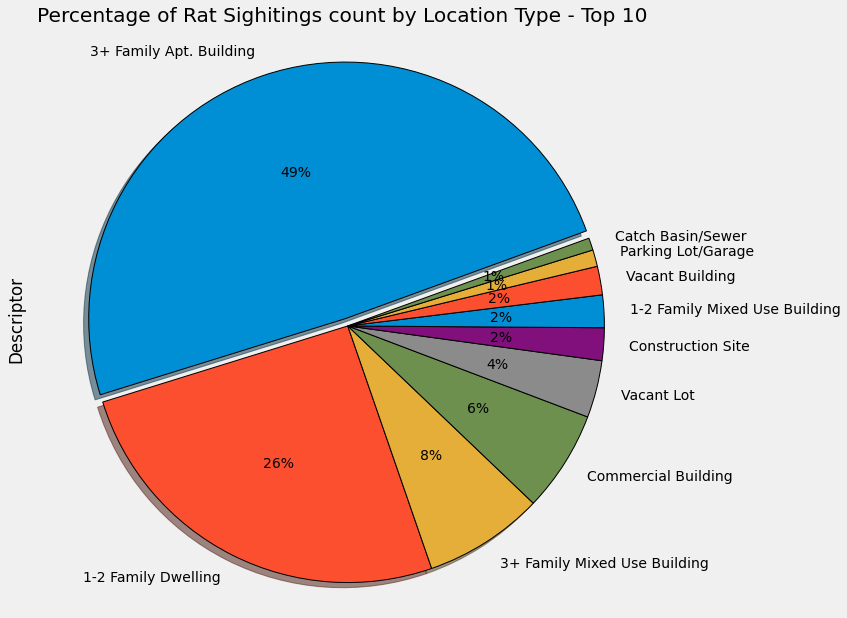

In [316]:
# Figure 4 : Pie chart showing the top 10 location type 
ax = df_Location.plot(kind='pie', figsize=(10,10), autopct='%1.0f%%',explode = (0.03, 0, 0, 0,0,0,0,0,0,0),shadow=True, startangle=20, wedgeprops={'linewidth': 1.0, 'edgecolor': 'black'}, title ='Percentage of Rat Sighitings count by Location Type - Top 10')
ax.axis('equal')

### ***`Interpretation: Representation of the overall complaints received for rat sightings from 2010 to present based on location type. This indicates majority of the reports were from family type apartment buildings with 3 or more units.`***
___

## **Conclusion:**

Based on the the analysis and interpretation of the data, we can infer two 

1) Yearly trends indicate a sharp increase from 2020 through 2021, which coincides with the onset of Covid-19. This suggest the pandemic related changes, such as less human outdoor presence, may have played a role in increased rat activity and sightings. 

2) Location type based study indicates Family type buildings have more rat sightings. From this it can be inferred that food abundance near human habitation may attract rat activity.

Futher study and research may be required to support the above conculsions.
